#Proponga y ejecute acá una rutina de análisis exploratorio de datos.
## Recuerde hacer uso de todo lo aprendido hasta el momento

## Librerías y dataset.

In [1]:
# Importamos las librerías necesarias.
import pandas as pd
import seaborn as sbn
import numpy as np
from seaborn import load_dataset

In [2]:
# Importamos las librerías de gráficos.
from seaborn import boxplot, color_palette, heatmap, kdeplot, lmplot
from matplotlib.pyplot import pie, show

In [3]:
# Cargamos el dataset de titanic para comenzar a trabajarlo.
titanic = load_dataset(name = "titanic")

## Exploración de los datos.

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [8]:
titanic.shape

(891, 15)

In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
titanic.groupby(['class']).size()

class
First     216
Second    184
Third     491
dtype: int64

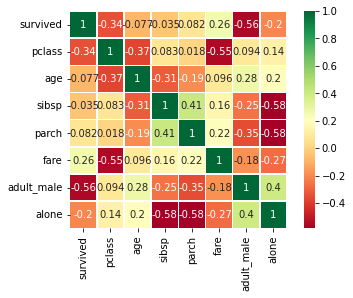

In [11]:
# Correlación de los datos
heatmap(data = titanic.corr(), annot = True, cmap = "RdYlGn", square = True, linewidths = float(0.5))

## Gráficos.

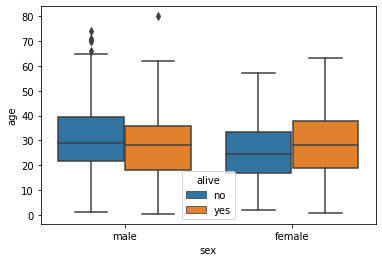

In [12]:
boxplot(x = "sex",
        y = "age",
        hue = "alive",
        data = titanic)

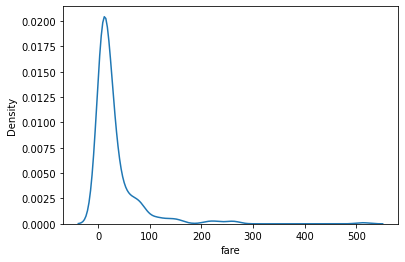

In [13]:
kdeplot(titanic.fare)

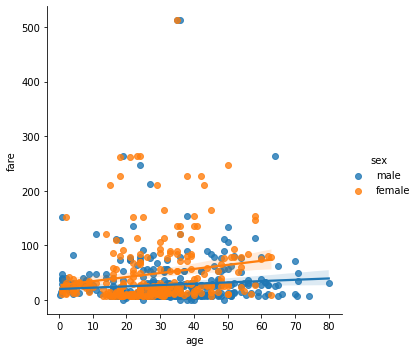

In [14]:
lmplot(x = "age", y = "fare", hue = "sex", data = titanic)

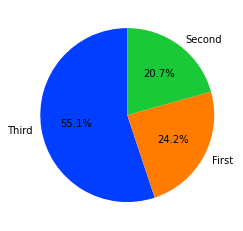

In [15]:
data = titanic["pclass"].value_counts().tolist()
labels = titanic["class"].unique()
colors = color_palette("bright")

pie(x = data,
    labels = labels,
    colors = colors,
    autopct = '%1.1f%%',
    pctdistance = float(0.6),
    shadow = False,
    startangle = 90)

show()

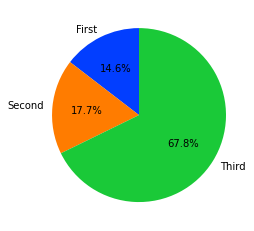

In [16]:
data = pd.DataFrame(titanic[titanic.alive == "no"].groupby(by = 'class')['alive'].count())
labels = data.index
colors = color_palette("bright")

pie(x = np.array(data).ravel(),
    labels = labels,
    colors = colors,
    autopct = '%1.1f%%',
    pctdistance = float(0.6),
    shadow = False,
    startangle = 90)

show()

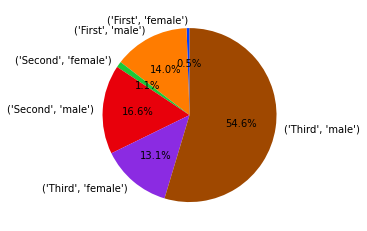

In [17]:
data = pd.DataFrame(titanic[titanic.alive == "no"].groupby(by = ['class', 'sex'])['alive'].count())
labels = data.index
colors = color_palette("bright")

pie(x = np.array(data).ravel(),
    labels = labels,
    colors = colors,
    autopct = '%1.1f%%',
    pctdistance = float(0.6),
    shadow = False,
    startangle = 90)

show()

En el siguiente gráfico se muestra la comparación entre los que sovrevivieron (*yes*) y los que no sobrevivieron (*no*).

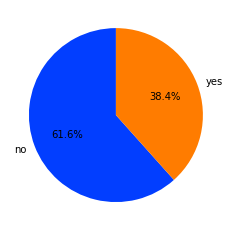

In [19]:
data = titanic["survived"].value_counts().tolist()
labels = titanic["alive"].unique()
colors = color_palette("bright")

pie(x = data,
    labels = labels,
    colors = colors,
    autopct = '%1.1f%%',
    pctdistance = float(0.6),
    shadow = False,
    startangle = 90)

show()